<a href="https://colab.research.google.com/github/NeSma237/Assignment-2-AI-Platforms-/blob/main/Assignment_2_Fashion_MNIST(AI_Platforms).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Import libraries
import torch as t
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

import os
# Print filenames in the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
# Define image transformations (ToTensor scales to [0, 1])
transform = transforms.Compose([transforms.ToTensor()])

# Load and create DataLoader for training set
mnist_trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)

# Load and create DataLoader for test set
mnist_testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=True)

In [14]:
# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # Linear layers
        self.linear1 = nn.Linear(28*28, 256) # Input to hidden 1
        self.linear2 = nn.Linear(256, 128) # Hidden 1 to hidden 2
        self.final = nn.Linear(128, 10) # Hidden 2 to output
        # Activation function
        self.relu = nn.ReLU()

    # Forward pass
    def forward(self, img):
        # Flatten image
        x = img.view(-1, 28*28)
        # Pass through layers with ReLU
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x

# Create model instance
net = Net()

In [15]:
# Define loss function and optimizer
cross_el = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(net.parameters(), lr=0.001)
epoch = 10

# Lists to store loss and accuracy for visualization
train_losses = []
train_accuracies = []

# Training loop
for epoch in range(epoch):
    net.train() # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for data in train_loader: # Iterate over the training data
        x, y = data
        optimizer.zero_grad() # Zero the gradients
        output = net(x.view(-1, 28*28)) # Forward pass
        loss = cross_el(output, y) # Calculate the loss
        loss.backward() # Backpropagation
        optimizer.step() # Update weights

        running_loss += loss.item()
        _, predicted = t.max(output.data, 1) # Get predicted class
        total += y.size(0) # Update total samples
        correct += (predicted == y).sum().item() # Update correct predictions

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

Epoch 1, Loss: 0.5271, Accuracy: 0.8125
Epoch 2, Loss: 0.3677, Accuracy: 0.8658
Epoch 3, Loss: 0.3276, Accuracy: 0.8791
Epoch 4, Loss: 0.3059, Accuracy: 0.8868
Epoch 5, Loss: 0.2861, Accuracy: 0.8930
Epoch 6, Loss: 0.2721, Accuracy: 0.8988
Epoch 7, Loss: 0.2576, Accuracy: 0.9039
Epoch 8, Loss: 0.2477, Accuracy: 0.9075
Epoch 9, Loss: 0.2364, Accuracy: 0.9103
Epoch 10, Loss: 0.2241, Accuracy: 0.9162


In [16]:
# Calculate training accuracy after training
correct = 0
total = 0

with t.no_grad(): # Disable gradient calculation
    for data in train_loader: # Iterate over the training data
        x, y = data
        output = net(x.view(-1, 784)) # Forward pass
        for idx, i in enumerate(output):
            if t.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.913


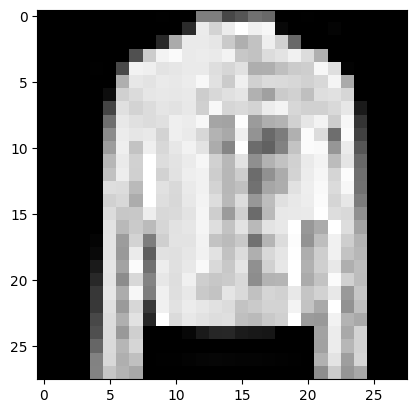

tensor(4)


In [17]:
# Visualize an example image and its prediction
plt.imshow(x[3].view(28, 28),cmap='gray') # Display the image
plt.show()
print(t.argmax(net(x[3].view(-1, 784))[0])) # Print the predicted label

In [18]:
# Calculate test accuracy
correct = 0
total = 0

with t.no_grad(): # Disable gradient calculation
    for data in test_loader:  # Use test_loader for testing
        x, y = data
        output = net(x.view(-1, 784)) # Forward pass
        for idx, i in enumerate(output):
            if t.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'Test accuracy: {round(correct/total, 3)}')

Test accuracy: 0.881


In [19]:
# Get all true and predicted labels for confusion matrix
all_true_labels = []
all_predicted_labels = []

with t.no_grad(): # Disable gradient calculation
    for data in test_loader: # Iterate over the test data
        x, y = data
        output = net(x.view(-1, 784)) # Forward pass
        predicted_labels = t.argmax(output, dim=1) # Get predicted labels

        all_true_labels.extend(y.tolist())
        all_predicted_labels.extend(predicted_labels.tolist())

# Convert lists to tensors
all_true_labels = t.tensor(all_true_labels)
all_predicted_labels = t.tensor(all_predicted_labels)

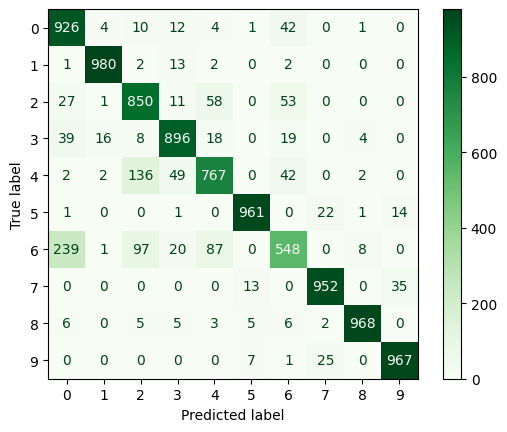

In [23]:
# Generate and display confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(all_true_labels, all_predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens') # Plot with 'Greens' colormap
plt.show()

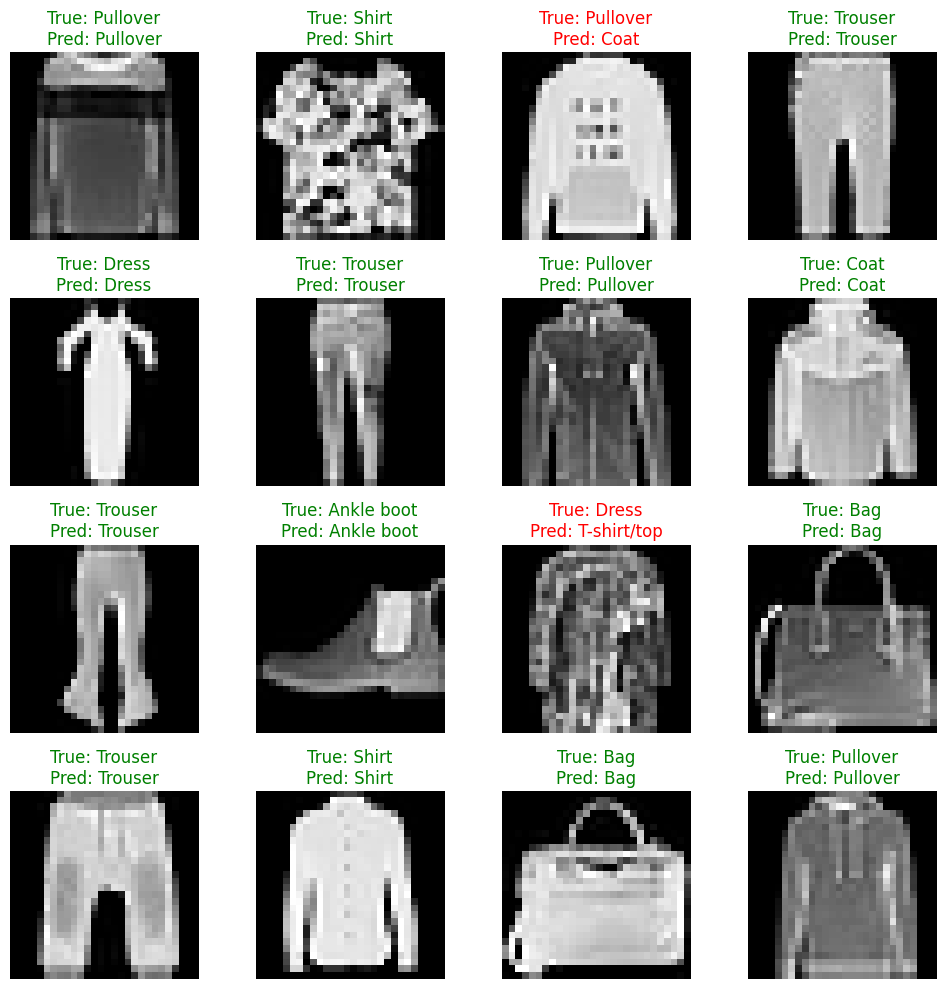

In [21]:
import numpy as np

# Function to get Fashion MNIST label name from ID
def get_fashion_mnist_label(label_id):
    labels = {
        0: 'T-shirt/top',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot'
    }
    return labels[label_id]

# Visualize example predictions
fig = plt.figure(figsize=(10, 10))
rows = 4
cols = 4
image_count = 0

with t.no_grad(): # Disable gradient calculation
    for data in test_loader: # Iterate over test data
        x, y = data
        output = net(x.view(-1, 784)) # Forward pass
        predicted_labels = t.argmax(output, dim=1) # Get predicted labels

        for i in range(len(x)):
            if image_count < rows * cols:
                ax = fig.add_subplot(rows, cols, image_count + 1)
                ax.imshow(x[i].view(28, 28), cmap='gray') # Display image in grayscale
                true_label = get_fashion_mnist_label(y[i].item())
                predicted_label = get_fashion_mnist_label(predicted_labels[i].item())
                title_color = 'green' if true_label == predicted_label else 'red'
                ax.set_title(f'True: {true_label}\nPred: {predicted_label}', color=title_color)
                ax.axis('off')
                image_count += 1
            else:
                break
        if image_count >= rows * cols:
            break

plt.tight_layout()
plt.show()

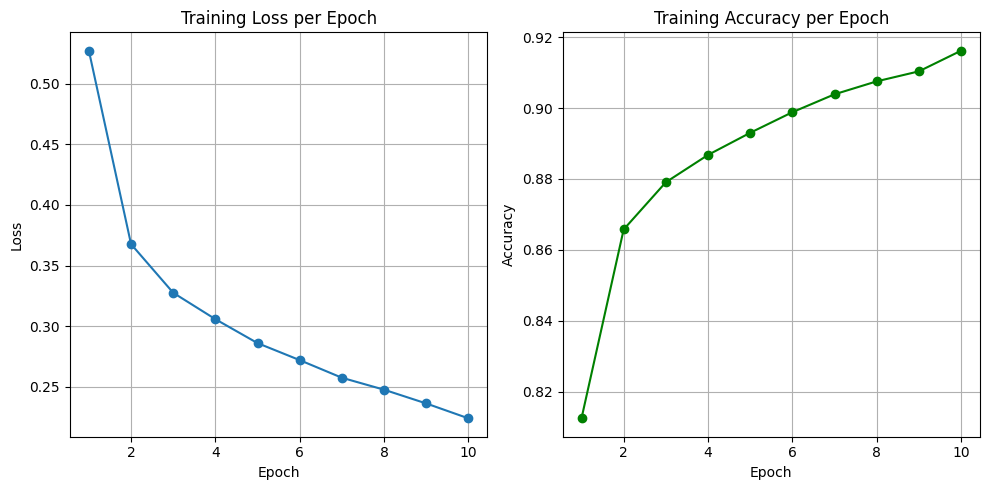

In [22]:
# Visualize loss and accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', color='green')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

## Summary:

### Q&A
- What is the final training accuracy?
The final training accuracy is 0.916.
- What is the final test accuracy?
The final test accuracy is 0.881.

### Data Analysis Key Findings
- The trained neural network achieved a test accuracy of 0.881.
- The confusion matrix provides a visual breakdown of the model's performance across each digit class, showing where the model made correct and incorrect predictions.
- Example images illustrate instances where the model correctly and incorrectly predicted the digit.

### Conclusion
The neural network trained on the Fashion MNIST dataset achieved a test accuracy of approximately 88.1%. The training process showed a consistent decrease in loss and increase in accuracy over 9 epochs, suggesting effective learning. The confusion matrix highlights areas where the model performs well and identifies classes with higher misclassification rates. Overall, the model demonstrates promising performance on this image classification task.
